In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import LabelEncoder

In [89]:
df = pd.read_csv('PlayTennis.csv')

In [90]:
df.head()

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


In [91]:
df = pd.DataFrame({col: df[col].astype('category').cat.codes for col in df}, index=df.index)


In [47]:
# play_map = {'yes': 1, 'no':0}

# df['play'] = df['play'].map(play_map)

In [92]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

print(y)

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: play, dtype: int8


In [93]:
print(X.shape, len(y))

(14, 4) 14


In [94]:
from sklearn.model_selection import train_test_split

X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print(len(X_train), len(y_train))

9 9


In [112]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [115]:

# 'criterion':['gini','entropy','log_loss'],
#   'splitter':['best','random'],
#   'max_depth':[1,2,3,4,5],
#   'max_features':['auto', 'sqrt', 'log2']
    
parameter = {'criterion': ['gini', 'entropy', 'log_loss'],
             'max_depth': [1,2,3,4],
             'max_features':['sqrt', 'log2']}

In [116]:
cv = GridSearchCV(model, param_grid=parameter, cv = 5, scoring = 'accuracy')
cv.fit(X_train, y_train)


C:\Users\ritup\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\ritup\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ritup\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ritup\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  F

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4],
                         'max_features': ['sqrt', 'log2']},
             scoring='accuracy')

In [117]:
cv.best_estimator_

DecisionTreeClassifier(max_depth=3, max_features='sqrt')

In [118]:
y_pred = cv.predict(X_test)

In [119]:
from sklearn.metrics import accuracy_score, classification_report

In [120]:
score=accuracy_score(y_pred,y_test)

In [121]:
score

0.6

In [105]:
from sklearn import tree

[Text(0.6666666666666666, 0.875, 'X[2] <= 0.5\ngini = 0.444\nsamples = 9\nvalue = [3, 6]'),
 Text(0.5, 0.625, 'X[3] <= 0.5\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.3333333333333333, 0.375, 'X[0] <= 1.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]')]

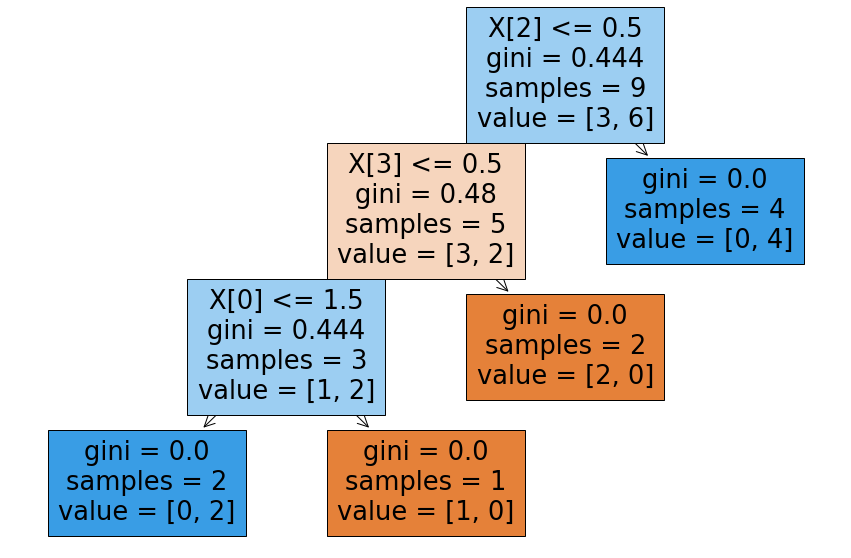

In [114]:
plt.figure(figsize=(15,10))
tree.plot_tree(model, filled = True)